In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('Top 100 Greatest Hollywood Actors of All Time.csv')

In [37]:
new_df = data[['Oscars', 'Oscar Nominations', 'BAFTA', 'BAFTA Nominations', 'Golden Globes', 'Golden Globe Nominations']]


In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(new_df)

data['Cluster'] = clusters

centers = kmeans.cluster_centers_

cluster_sums = np.sum(centers, axis=1)

sorted_clusters = np.argsort(cluster_sums)

data['Cluster'] = data['Cluster'].map({sorted_clusters[0]: 1, sorted_clusters[1]: 2, sorted_clusters[2]: 3})

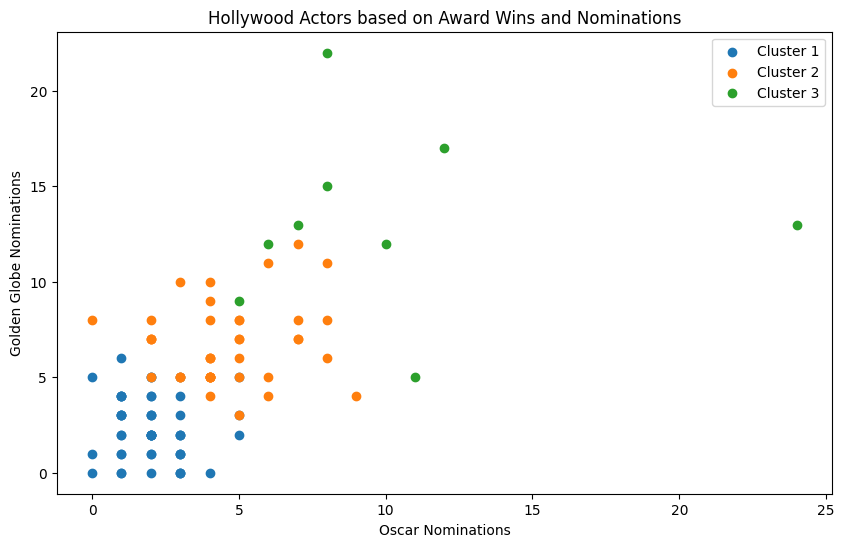

In [39]:
plt.figure(figsize=(10, 6))

for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster + 1]
    plt.scatter(cluster_data['Oscar Nominations'], cluster_data['Golden Globe Nominations'], label=f'Cluster {cluster + 1}')

plt.title('Hollywood Actors based on Award Wins and Nominations')
plt.xlabel('Oscar Nominations')
plt.ylabel('Golden Globe Nominations')
plt.legend()
plt.show()

In [40]:
for cluster in range(3):
    print(f"Cluster {cluster + 1}:")
    cluster_data = data[data['Cluster'] == cluster + 1]
    print(cluster_data[['Name', 'Oscars', 'Oscar Nominations', 'BAFTA', 'BAFTA Nominations', 'Golden Globes', 'Golden Globe Nominations']])
    print()

Cluster 1:
                   Name  Oscars  Oscar Nominations  BAFTA  BAFTA Nominations   
2          Alan Rickman       0                  0      1                  4  \
8      Benicio Del Toro       1                  2      1                  2   
9           Bill Murray       0                  1      1                  1   
12           Cary Grant       0                  2      0                  1   
13      Charles Chaplin       1                  4      0                  0   
14     Charles Laughton       1                  3      0                  2   
15      Charlton Heston       1                  1      0                  0   
16       Christian Bale       1                  2      0                  2   
17      Christoph Waltz       2                  2      2                  2   
18  Christopher Plummer       1                  2      1                  1   
19   Christopher Walken       1                  2      1                  2   
20          Clark Gable      